In [117]:
! pip install matplotlib 
! pip install mplfonts 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import pandas as pd
import warnings 
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential, load_model
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init()
from mplfonts import use_font
use_font('Noto Serif CJK SC')#指定中文字体

from sklearn.preprocessing import MinMaxScaler
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
import seaborn as sns 
sns.set_palette("husl") #设置所有图的颜色，使用hls色彩空间
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差

In [129]:
q4_res=pd.read_excel('MGIG8.xlsx')#需要更改为三个文件遍历
q4_res

,月份,年份,放牧小区（plot）,放牧强度（intensity）,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),沙漠化程度指数,有机物含量,土壤湿度,土壤板结化指数,jiehe
0,1,2012,G8,MGI,16.253527,6.933333,23.18686,2.143694,10.021598,13.73,30.87,42.79,168.56,0.572175,-2.717864,-12.113044,0.114686,0.343430
1,2,2012,G8,MGI,16.253527,6.933333,23.18686,2.143694,10.021598,13.00,30.87,42.79,168.56,0.572175,-2.717864,-12.205622,0.113009,0.342592
2,3,2012,G8,MGI,16.253527,6.933333,23.18686,2.143694,10.021598,12.60,30.87,42.79,168.56,0.572175,-2.717864,-12.256350,0.112090,0.342132
3,4,2012,G8,MGI,16.253527,6.933333,23.18686,2.143694,10.021598,11.97,30.73,42.76,168.56,0.572175,-2.717864,-12.446052,0.108653,0.340414
4,5,2012,G8,MGI,16.253527,6.933333,23.18686,2.143694,10.021598,14.18,29.99,42.58,168.56,0.572175,-2.717864,-12.762805,0.102914,0.337544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,8,2020,G8,MGI,14.442100,1.885500,16.32760,1.941050,8.411736,20.79,56.63,68.52,166.51,0.428470,-7.461369,24.702216,0.695773,0.562121
128,9,2020,G8,MGI,14.442100,1.885500,16.32760,1.941050,8.411736,20.04,56.67,76.04,166.32,0.428470,-7.461369,30.467347,0.800227,0.614349
129,10,2020,G8,MGI,14.442100,1.885500,16.32760,1.941050,8.411736,16.59,52.88,80.84,166.09,0.428470,-7.461369,31.414091,0.817381,0.622925
130,11,2020,G8,MGI,14.442100,1.885500,16.32760,1.941050,8.411736,15.04,50.66,82.25,165.95,0.428470,-7.461369,30.941572,0.808820,0.618645


In [130]:
#选择区域
Block='G8'#按文件名一致

In [131]:
# 选出某个小区(如G21)月份是9月份 的所有数据
gBlock_9=q4_res[(q4_res['放牧小区（plot）']==Block ) & (q4_res['月份']==9 )]
gBlock_9.reset_index(inplace=True,drop=True)
gBlock_9=gBlock_9.groupby('年份').mean()# 按年份合并，每一年的数值为均值
gBlock_9.reset_index(inplace=True,drop=False)
gBlock_9


,年份,月份,SOC土壤有机碳,SIC土壤无机碳,STC土壤全碳,全氮N,土壤C/N比,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2),沙漠化程度指数,有机物含量,土壤湿度,土壤板结化指数,jiehe
0,2012,9.0,13.677481,9.541667,23.219148,1.763731,13.412295,17.12,45.67,55.29,168.38,0.572175,2.115294,7.162778,0.551501,0.561838
1,2014,9.0,14.968442,7.150000,22.118442,1.694780,13.509831,12.84,29.71,45.27,167.79,0.494972,-0.190961,-11.003535,0.180572,0.337772
2,2016,9.0,14.028019,6.700000,20.728019,1.833418,11.945595,16.22,33.22,43.44,167.39,0.464970,-1.234537,-9.815781,0.183184,0.324077
3,2018,9.0,14.581394,2.816667,17.398060,1.865450,9.564032,18.27,49.75,60.56,167.15,0.488002,-6.042445,13.943441,0.526550,0.507276
4,2020,9.0,14.442100,1.885500,16.327600,1.941050,8.411736,20.04,56.67,76.04,166.32,0.428470,-7.461369,30.467347,0.800227,0.614349


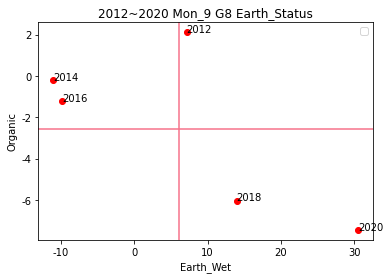

In [132]:
# G21 5年的土壤湿度和有机物含量相对关系
wet=gBlock_9['土壤湿度'].values
org=gBlock_9['有机物含量'].values
year=[2012,2014,2016,2018,2020]

fig,ax=plt.subplots()
ax.scatter(wet,org,c='r')

for i,txt in enumerate(year):
    ax.annotate(txt,(wet[i],org[i]))

plt.axhline(y=org.mean(),ls="-")
plt.axvline(x=wet.mean(),ls="-")
plt.legend()
#plt.xlabel('土壤湿度')
#plt.ylabel('有机物含量')
plt.xlabel('Earth_Wet')
plt.ylabel('Organic')
s='2012~2020 Mon_9 '+Block+' Earth_Status'
plt.title (s)
plt.savefig(s+'.png')

In [133]:
dataset=gBlock_9[['土壤湿度', '有机物含量']]
dataset

,土壤湿度,有机物含量
0,7.162778,2.115294
1,-11.003535,-0.190961
2,-9.815781,-1.234537
3,13.943441,-6.042445
4,30.467347,-7.461369


In [134]:
#########LSTM多变量模型#############
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences)-1:
            break
        # 最关键的不一样在这一步
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def fitlstmmodel(dataset,n_steps=1):
    #dataset：数据标准化后的dataset
    # n_steps：分片大小，默认为1
    #依次为：'PM2.5','AQI',  'PM10', 'SO2', 'CO', 'NO2', 'O3_8h', '最高气温', '最低气温'

    in_seq1= dataset[:,0].reshape((dataset.shape[0], 1))
    in_seq2= dataset[:,1].reshape((dataset.shape[0], 1))

    dataset = np.hstack((in_seq1, in_seq2))
    X, y = split_sequences(dataset, n_steps)
    n_features = X.shape[2]#2
    model = Sequential()
    model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(300, activation='relu'))

    # 和多对一不同点在于，这里多对多的Dense的神经元=features数目
    model.add(Dense(n_features))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=2,shuffle=False)
    model.save('lstm_model.h5')
    last_input=np.array(dataset[-1:,:])
    return X,y,last_input,n_features,n_steps
# 将整型变为float
dataset = dataset.astype('float32')
#对数据集合进行标准化
scaler = MinMaxScaler(feature_range=(0, 1))

dataset=scaler.fit_transform(dataset)
#输入为标准化后的dataset 	#输出：X为lstm的输入，y为lstm的输出，x_input_last为最后一行dataset的数据，用于预测未来的输入,n_features是特征维度，n_steps是切片分层
X,y,last_input,n_features,n_steps=fitlstmmodel(dataset,n_steps=1)

Epoch 1/100
1/1 - 3s - loss: 0.2983 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 0.2944 - 17ms/epoch - 17ms/step
Epoch 3/100
1/1 - 0s - loss: 0.2911 - 15ms/epoch - 15ms/step
Epoch 4/100
1/1 - 0s - loss: 0.2881 - 16ms/epoch - 16ms/step
Epoch 5/100
1/1 - 0s - loss: 0.2849 - 16ms/epoch - 16ms/step
Epoch 6/100
1/1 - 0s - loss: 0.2817 - 12ms/epoch - 12ms/step
Epoch 7/100
1/1 - 0s - loss: 0.2784 - 15ms/epoch - 15ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2748 - 16ms/epoch - 16ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2711 - 14ms/epoch - 14ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2672 - 12ms/epoch - 12ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2630 - 14ms/epoch - 14ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2586 - 14ms/epoch - 14ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2540 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2492 - 17ms/epoch - 17ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2441 - 15ms/epoch - 15ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2388 - 15ms/epoch - 15ms/step
Epoch 17/100
1/1 - 0s

MAPE :
50.414758920669556
RMSE :
8.343009
MAE :
6.4626155


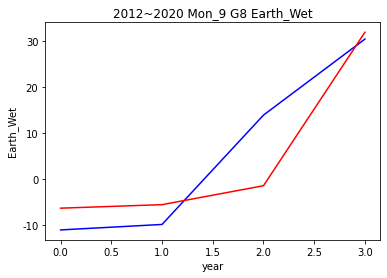

MAPE :
59.82639193534851
RMSE :
1.4288286
MAE :
1.1206517


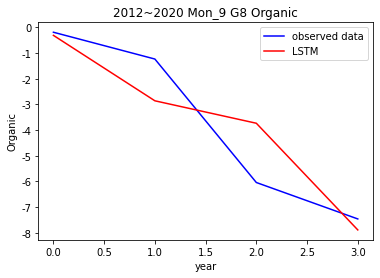

In [135]:
###预测与评分
#输入1为lstm的输入X，输入2为lstm的输出y，用于训练模型,输入3为标准化模型
#输出：testPredict为预测close的训练数据，testY为close的真实数据
#该函数目标输出训练的RMSE以及预测与训练数据的对比
def Predict_RMSE_BA(X,y,scaler):
    model=load_model('lstm_model.h5') 
    trainPredict = model.predict(X)
    testPredict = scaler.inverse_transform(trainPredict)
    testY = scaler.inverse_transform(y)
    score(testY[:,0], testPredict[:,0])
    
    #土壤湿度', '有机物含量'
    plt.plot(testY[:,0],color='blue', label='observed data')
    plt.plot(testPredict[:,0], color='red', label='LSTM')
    plt.xlabel('year')
    plt.ylabel('Earth_Wet')
    s='2012~2020 Mon_9 '+Block+' Earth_Wet'
    plt.title (s)
    plt.savefig(s+'.jpg')
    plt.show()

    
    score(testY[:,1], testPredict[:,1])
    plt.plot(testY[:,1],color='blue', label='observed data')
    plt.plot(testPredict[:,1], color='red', label='LSTM')
    plt.xlabel('year')
    plt.ylabel('Organic')
    s='2012~2020 Mon_9 '+Block+' Organic'
    plt.title (s)
    plt.legend()
    plt.savefig(s+'.jpg')
    plt.show()
    return testPredict,testY
def score(y_true, y_pre):
    # MSE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(metrics.mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(metrics.mean_absolute_error(y_true, y_pre)) 
    # # R2
    # print("R2 :")
    # print(np.abs(r2_score(y_true,y_pre)))
testPredict,testY=Predict_RMSE_BA(X,y,scaler)


In [136]:
def Predict_future_plot(predict_forword_number,x_input,n_features,n_steps,scaler,testPredict,testY):
    model=load_model('lstm_model.h5') 
    predict_list=[]
    predict_list.append(x_input)
    while len(predict_list) < predict_forword_number:

        x_input = predict_list[-1].reshape((-1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
         #预测新值
        predict_list.append(yhat)
    #取出    
    
    Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))
    return Predict_forword[1:,:].tolist()

y_pre=Predict_future_plot(2,last_input,n_features,n_steps,scaler,testPredict,testY)
y_pre

[[50.57168679221847, -9.000793216850731]]

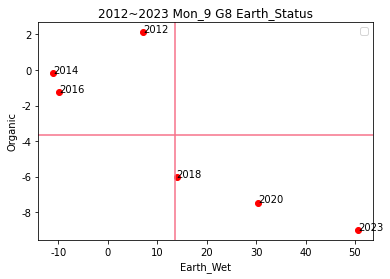

In [137]:
# G21 5年的土壤湿度和有机物含量相对关系
wet=gBlock_9['土壤湿度'].values
org=gBlock_9['有机物含量'].values
wet=np.append(wet,y_pre[0][0])
org=np.append(org,y_pre[0][1])
year=[2012,2014,2016,2018,2020,2023]

fig,ax=plt.subplots()
ax.scatter(wet,org,c='r')

for i,txt in enumerate(year):
    ax.annotate(txt,(wet[i],org[i]))

plt.axhline(y=org.mean(),ls="-")
plt.axvline(x=wet.mean(),ls="-")
plt.legend()
#plt.xlabel('土壤湿度')
#plt.ylabel('有机物含量')
plt.xlabel('Earth_Wet')
plt.ylabel('Organic')
s='2012~2023 Mon_9 '+Block+' Earth_Status'
plt.title (s)
plt.savefig(s+'.jpg')